# Exercise 6.4 Practice

# 01. Importing Libraries

In [6]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# create path

path = r"C:\Users\kthav\My Pc\Desktop\Career Foundry\Sourcing Open Data"

In [12]:
path

'C:\\Users\\kthav\\My Pc\\Desktop\\Career Foundry\\Sourcing Open Data'

In [19]:
df = pd.read_csv(os.path.join(path, 'real_estate.csv'), index_col = False)

In [21]:
df.shape

(414, 8)

In [23]:
df.head(10)

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   
5   6             2012.667           7.1   
6   7             2012.667          34.5   
7   8             2013.417          20.3   
8   9             2013.500          31.7   
9  10             2013.417          17.9   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   
5                              2175.03000                                3   
6                               623.47310                                7   
7                               287.60250                                6   
8                              5512.03800                                1   
9                              1783.18000                                3   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1  
5     24.96305     121.51254                        32.1  
6     24.97933     121.53642                        40.3  
7     24.98042     121.54228                        46.7  
8     24.95095     121.48458                        18.8  
9     24.96731     121.51486                        22.1

# 02. Data Cleaning

In [26]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [28]:
# Rename the columns in the same way as in Exercise 6.2.
df.columns
df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

In [32]:
# check for missing valaues

df.isnull().sum()

No                0
Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

In [36]:
# check for duplicates

dups = df.duplicated()

In [38]:
dups.shape

(414,)

C:\Users\kthav\AppData\Local\Temp\ipykernel_6532\2679592036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price per unit'], bins=25)


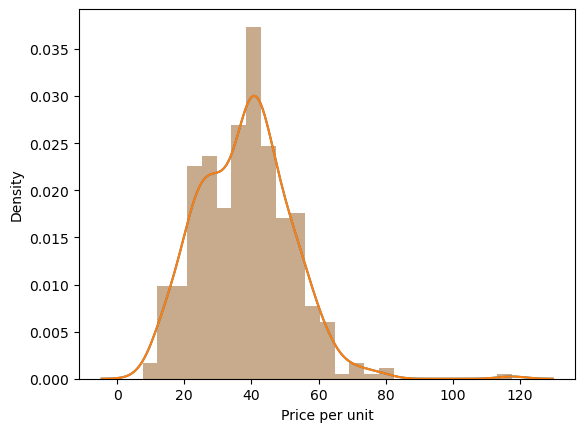

In [46]:
# check for extreme values

sns.distplot(df['Price per unit'], bins=25)

plt.show()

In [48]:
df['Price per unit'].mean() # Check the mean

37.980193236714975

In [50]:
df['Price per unit'].median() # Check the median

38.45

In [52]:
df['Price per unit'].max() # Check the max

117.5

# 03. Data Prep for Regression Analysis

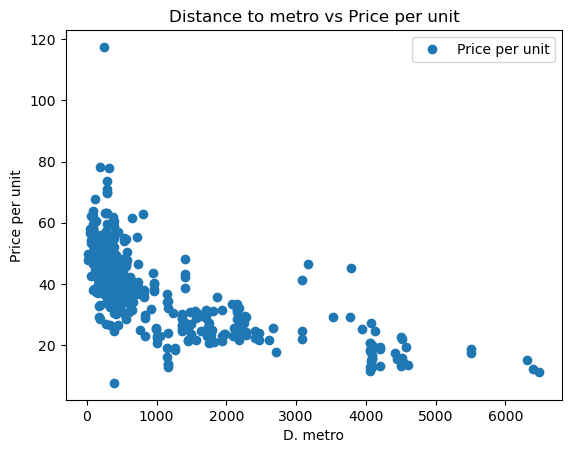

In [55]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'D. metro', y='Price per unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('D. metro')  
plt.ylabel('Price per unit')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['D. metro'].values.reshape(-1,1)
y = df['Price per unit'].values.reshape(-1,1)

In [61]:
X

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [63]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression Analysis

In [66]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [68]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [70]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)